# Project Results Group N1

This notebook provides all necessary commands and linkings to generate novel face images from our trained conditional generator model.

The required pre-trained models (cPGAN and DCGAN) and code will be loaded from automatically from google drive and the github repository. Just execute all setups cells and you are ready to go in a few seconds! No manual upload is needed.

For the project summary and code details visit our repository at [GitHub](https://github.com/konstantinjdobler/gan-n1).
To download the models manually go to our [drive](https://drive.google.com/drive/folders/1S0dfdo0s9yk9h8Q1sqvOqV3MDdAiGBPo).

**Authors:** Konstantin Dobler, Stefanie Lewandowski, Kenneth Schröder, Pascal Schulze, and Ole Wegen


# Setup

All necessary (meta) files (models, losses and code) will be downloaded here for generation and visualization. 

The whole process can take a few seconds.

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import csv

In [2]:
# Clone gan-n1 repository
%cd /content/
! rm -rf 'gan-n1'
! git clone https://github.com/konstantinjdobler/gan-n1.git
! mkdir gan-n1/generated_images
! mkdir gan-n1/generated_images/pgan/
! mkdir gan-n1/generated_images/dcgan/

/content
Cloning into 'gan-n1'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 660 (delta 173), reused 157 (delta 82), pack-reused 395
Receiving objects: 100% (660/660), 340.68 MiB | 39.19 MiB/s, done.
Resolving deltas: 100% (410/410), done.


In [3]:
# Download PGAN model from drive
file_id = "1ePOOSm_CFxFwCuSYzFiTlakOmB6lo8JT"
PGAN_MODEL_PATH = "gan-n1/src/PGAN/MODEL.pt"
! wget -q --show-progress --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O- | sed -n 's/.*\(confirm=....\).*/\1/p')&id={file_id}" -O {PGAN_MODEL_PATH} && rm -rf /tmp/cookies.txt

# Download PGAN losses from drive
file_id = "1sFn0OnJ4drqj2vHXHUpdxcRs70hQ1mVH"
PGAN_LOSS_PATH = "gan-n1/src/PGAN/LOSS.txt"
! wget -q --show-progress --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O {PGAN_LOSS_PATH}

gan-n1/src/PGAN/MOD     [             <=>    ] 529.08M  92.5MB/s    in 5.9s    
gan-n1/src/PGAN/LOS     [  <=>               ]   7.15M  26.9MB/s    in 0.3s    


In [4]:
# Download DCGAN model from drive
file_id = "1fkbmCkhAJ-pa6k5NBBD3vJN3ajqjY39X"
DCAN_MODEL_PATH = "gan-n1/src/DCGAN/MODEL.pt"
! wget -q --show-progress --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id={file_id}' -O- | sed -n 's/.*\(confirm=....\).*/\1/p')&id={file_id}" -O {DCAN_MODEL_PATH} && rm -rf /tmp/cookies.txt


gan-n1/src/DCGAN/MO     [  <=>               ]  77.05M   319MB/s    in 0.2s    


# Image Generation

Here, we will demonstrate our model inference. First, we will compare our two models (cPGAN and cDCGAN) in general. Then we will show some interesting effects in the images we were able to generate.

To speed up the generation, you can switch the runtime to use GPU hardware acceleration.

---



In [5]:
# Setup generation code
def generate_images_dcgan(attribute_file, number_of_images=8, image_ratio=128, latent_vector_dimension=512):
  output_file_name = f"gan-n1/generated_images/dcgan/{attribute_file}.png"
  print("cDCGAN results:")
  !python3 gan-n1/src/DCGAN/generate.py --result-path {output_file_name} \
    -g {DCAN_MODEL_PATH} \
    --attributes "gan-n1/src/attribute_files/{attribute_file}.txt"\
    -n {number_of_images} \
    -r {image_ratio} \
    --nz {latent_vector_dimension}
  return output_file_name

def generate_images_pgan(attribute_file, number_of_images=8, image_ratio=128):
  output_file_name = f"gan-n1/generated_images/pgan/{attribute_file}.png"
  print("cPGAN results:")
  ! python3 gan-n1/src/PGAN/generate.py \
    --result-path {output_file_name} \
    --c {PGAN_MODEL_PATH} \
    -a gan-n1/src/attribute_files/{attribute_file}.txt \
    -n {number_of_images} \
    -r {image_ratio}
  return output_file_name

## General comparison

Blonde women is one of the combinations where the cDCGAN performs best. For blonde hair, the model has been able to learn a good amount of texture. However, you will notice that many results look similar, especially the eyes, eyebrows, and mouths. This is because the cDCGAN model suffers from a degree of mode collapse. Nevertheless, the faces do look distinct.

cDCGAN results:
Running on the GPU


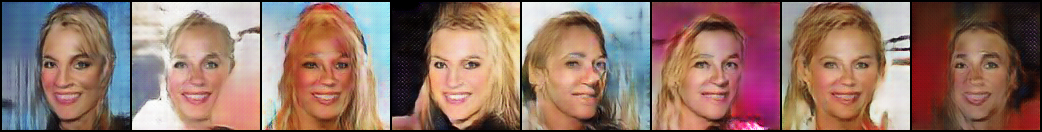

cPGAN results:
Running on the GPU


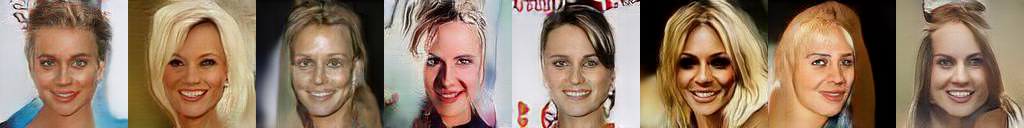

In [19]:
display(Image(generate_images_dcgan("attributes_blond_woman")))
Image(generate_images_pgan("attributes_blond_woman"))

Now we demonstrate a category where the cPGAN performs better. Its results are significantly more detailed and have a more reali

cDCGAN results:
Running on the GPU


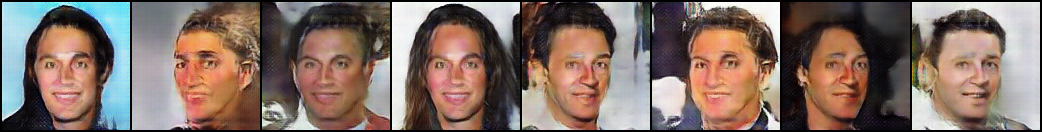

cPGAN results:
Running on the GPU


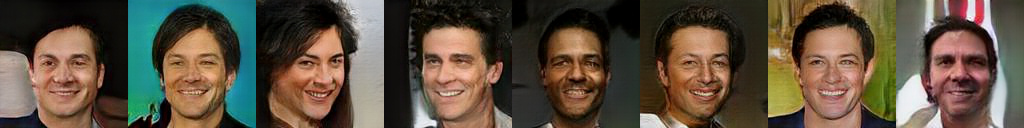

In [7]:
display(Image(generate_images_dcgan("attributes_blackhaired_man")))
Image(generate_images_pgan("attributes_blackhaired_man"))

Here we demonstrate an attribute combination that generally produces unsatisfying results. 

cDCGAN results:
Running on the GPU


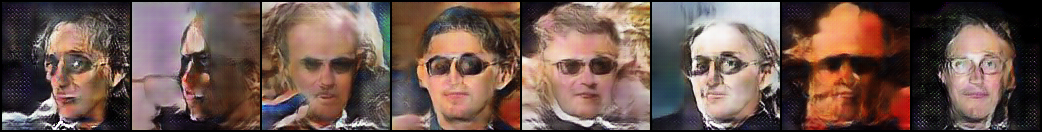

cPGAN results:
Running on the GPU


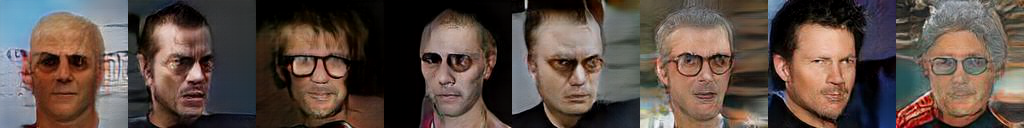

In [8]:
display(Image(generate_images_dcgan("attributes_bald_man_glasses")))
Image(generate_images_pgan("attributes_bald_man_glasses"))

# Loss Plots

For evaluating the *PGAN training's flow* we have saved interim loss values during training for generator and discriminiator. The visualization of these value can be seen here to understand more how the relation between these both adversaries changed with time.




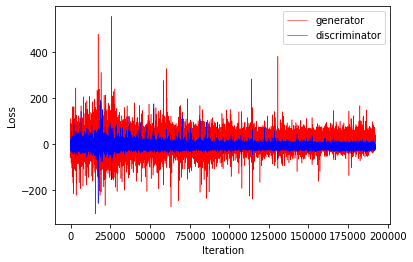

In [12]:
# ! python3 gan-n1/src/PGAN/helper/make_chart.py {LOSS_PATH}
x=[]
yg = []
yd = []

with open(PGAN_LOSS_PATH, 'r') as csvfile:
  plots = csv.reader(csvfile,delimiter=",")
  for count, row in enumerate(plots):
    x.append(count)
    yg.append(float(row[1]))
    yd.append(float(row[0]))

plt.plot(x,yg,linewidth=0.5, color='red', label='generator')
plt.plot(x,yd,linewidth=0.5, color='blue', label='discriminator')

plt.legend(loc='best')

plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

# Playground


Here you have the possibility to test out the models yourselves by trying different attribute combinations. Setting an attribute to ```1``` enables that condition, while setting it to ```-1``` disables that condition. Keep in mind that setting multiple mutually exclusive attributes to true such as ```Bald:1``` and ```Black_Hair:1``` will lead to bad results. Keep in mind that there are a lot of mutually exclusive attributes. Also, there are attributes that are not necessarily mutually exclusive like ```Bald:1``` and ```Male:-1``` (female) will still yield bad results as they are likely a rare combination in the training data.

It is most interesting to change one attribute at a time and observe the resulting changes. As a starter: ```Smiling:1``` with ```Mouth_Slightly_Open:-1``` usually generates faces with smiles that show no teeth, while setting ```Mouth_Slightly_Open:1``` creates faces where the smiles show more teeth.

In [13]:
def create_custom_attribute_file(attribute_dict):
  with open('gan-n1/src/attribute_files/custom_attributes.txt', "w") as attr_file:
            attr_file.writelines((f'{attr},{value}\n' for attr, value in attribute_dict.items()))

cDCGAN results:
Running on the GPU


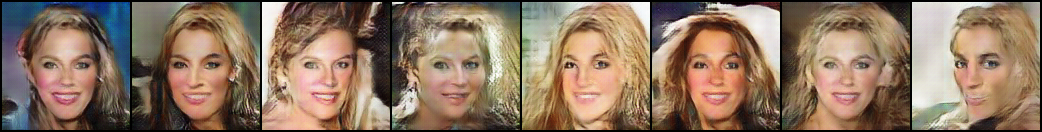

cPGAN results:
Running on the GPU


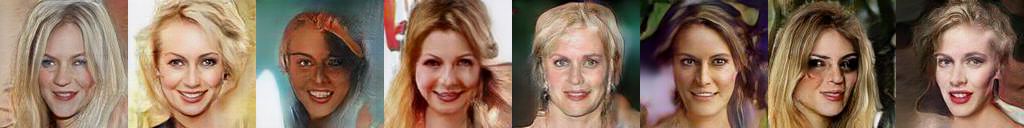

In [14]:
attributes = {
"5_o_Clock_Shadow":-1,
"Arched_Eyebrows":-1,
"Attractive":1,
"Bags_Under_Eyes":-1,
"Bald":-1,
"Bangs":-1,
"Big_Lips":-1,
"Big_Nose":-1,
"Black_Hair":-1,
"Blond_Hair":1,
"Blurry":-1,
"Brown_Hair":-1,
"Bushy_Eyebrows":-1,
"Chubby":-1,
"Double_Chin":-1,
"Eyeglasses":-1,
"Goatee":-1,
"Gray_Hair":-1,
"Heavy_Makeup":1,
"High_Cheekbones":-1,
"Male":-1,
"Mouth_Slightly_Open":1,
"Mustache":-1,
"Narrow_Eyes":-1,
"No_Beard":1,
"Oval_Face":-1,
"Pale_Skin":-1,
"Pointy_Nose":-1,
"Receding_Hairline":-1,
"Rosy_Cheeks":-1,
"Sideburns":-1,
"Smiling":1,
"Straight_Hair":-1,
"Wavy_Hair":1,
"Wearing_Earrings":1,
"Wearing_Hat":-1,
"Wearing_Lipstick":1,
"Wearing_Necklace":-1,
"Wearing_Necktie":-1,
"Young":1
}
create_custom_attribute_file(attributes)
display(Image(generate_images_dcgan("custom_attributes")))
Image(generate_images_pgan("custom_attributes"))